In [6]:
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [7]:
dataset = pd.read_csv("505_DATAPOINTS.csv")
dataset= dataset.iloc[650:]
dataset = dataset.iloc[:-200]

In [8]:
dataset.head()

,time,cycles,instructions,branch-misses,cache-misses,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss,CPI
650,196.179325,1339330646,1564960461,11452043,19803716,82708026,63872,6269223,397993,11735130,382623,148995,1585,22456,9208410,9489732,0.855824
651,196.479771,1340868645,1770944828,12605418,16677671,117061033,64457,6956207,831209,12610823,321161,150661,1480,29951,11235127,11444913,0.757149
652,196.780262,1335218370,1227937754,8871690,29148399,114285029,58618,11775626,789005,9194463,511480,212394,1852,33404,12279390,12703080,1.087366
653,197.080670,1333627834,860549471,12965492,35725134,51995788,61547,15283927,1867,14380096,3749310,10956,1127,34046,16004525,14982864,1.549740
654,197.381115,1342991494,880104647,14575751,30309609,40281827,66649,10038979,2157,13928467,4503265,1837,1503,42362,16791479,15647138,1.525945


In [9]:
dataset.describe()

,time,cycles,instructions,branch-misses,cache-misses,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss,CPI
count,1071.000000,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1071.000000,1.071000e+03,1.071000e+03,1.071000e+03,1071.000000
mean,356.918715,1.342355e+09,1.184115e+09,1.634136e+07,2.089248e+07,7.094051e+07,1.571845e+05,7.631910e+06,5.153646e+05,1.632488e+07,6.565209e+05,2.133267e+05,1649.031746,6.504439e+04,1.602151e+07,1.712794e+07,1.182744
std,92.939514,4.018055e+07,2.581506e+08,6.682458e+06,1.343559e+07,3.779005e+07,1.544779e+06,7.773009e+06,1.492444e+06,6.690824e+06,1.412301e+06,7.389121e+05,1856.297572,1.774700e+05,8.186476e+06,8.043984e+06,0.249300
min,196.179325,6.802146e+08,5.221102e+08,1.263720e+05,4.261570e+05,8.340925e+06,1.921800e+04,2.424400e+04,7.520000e+02,8.031500e+04,2.754000e+03,3.580000e+02,267.000000,1.681700e+04,8.717810e+05,4.979259e+06,0.525561
25%,276.540817,1.335620e+09,1.071171e+09,1.029314e+07,1.011902e+07,4.560881e+07,3.952150e+04,2.268064e+06,3.808000e+03,1.032913e+07,9.044100e+04,2.847500e+03,815.500000,2.766250e+04,1.106162e+07,1.222952e+07,1.063241
50%,356.918067,1.343121e+09,1.144102e+09,1.745431e+07,1.831660e+07,5.442825e+07,8.231100e+04,4.962779e+06,5.656000e+03,1.760754e+07,1.375540e+05,4.602000e+03,1560.000000,5.729200e+04,1.317287e+07,1.456559e+07,1.180150
75%,437.296993,1.356265e+09,1.262606e+09,2.291515e+07,2.836725e+07,8.485223e+07,1.270055e+05,1.001844e+07,2.664935e+05,2.291138e+07,4.463425e+05,1.183140e+05,2123.000000,7.557400e+04,1.790194e+07,1.901154e+07,1.246423
max,517.673150,1.428287e+09,2.538551e+09,2.598343e+07,6.946621e+07,2.596293e+08,3.585972e+07,4.142643e+07,1.042994e+07,2.579375e+07,9.360156e+06,6.172711e+06,46902.000000,4.596802e+06,5.546010e+07,5.483737e+07,2.542541


In [10]:
instruction = dataset['instructions']
print(instruction.shape)

(1071,)


In [11]:
instructions = dataset['instructions'].values.reshape(-1,1) #extracting values of column instructions
print(instructions.shape)
y=dataset['CPI']  #setting y as CPI

X = dataset.drop(['CPI','cycles','time','instructions' ,'LLC-load-misses', 'L1-icache-load-misses','branch-load-misses'  ,'l2_rqsts.code_rd_miss','l2_rqsts.demand_data_rd_miss','l2_rqsts.all_demand_miss'], axis = 1) #dropping all the other column which is not required
X = np.divide(X, instructions)  #dividing each columns value with instruction count (so all values are between 0 and 1)
#'LLC-store-misses','L1-icache-load-misses','l2_rqsts.all_demand_miss','dTLB-store-misses','l2_rqsts.code_rd_miss'

(1071, 1)


In [12]:
# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column]>0.95)] 
print(to_drop)

['branch-load-misses', 'l2_rqsts.code_rd_miss', 'l2_rqsts.all_demand_miss']


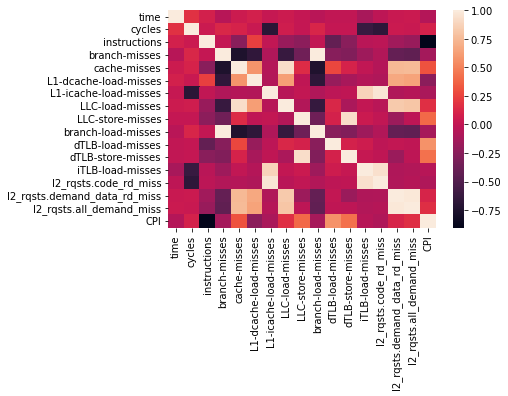

In [13]:
X.head()

#print(dataset.corr())
sn.heatmap(dataset.corr())
#sn.heatmap(X.corr())

In [14]:
from sklearn.model_selection import train_test_split  # performing train test split so that we can train our model on training data and test the model on testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0) #specifying how much should be train test split
print(X_train.shape)
print(X_test.shape)

(963, 7)
(108, 7)


In [15]:
from sklearn.linear_model import Lasso  # used Lasso model for prediction becuase our aim is to get non-negative co-efficient
regressor = Lasso(alpha=0.00000000001,positive=True,max_iter=100) #setting parameter for Lasso difining alpha and setting how much max iter should be

temp=regressor.fit(X_train,y_train)  

coeff_df = pd.DataFrame(temp.coef_, X_train.columns, columns=['Cofficient']) # getting coefficient value with the name of column for which co-efficient is generated
print(coeff_df)
print()

print('Linear Intercept term: ',temp.intercept_) # obtaining intercept term

y_pred = regressor.predict(X_test)  # predicting the value of y(i.e. CPI) for testing data so that we can check how accurate our model is

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
print()
rmse = sqrt(mean_squared_error(y_test, y_pred))  # Computing value of Root Mean Square Error for testing data
print("RMSE:- ",rmse)

rsq = r2_score(y_test,y_pred) # Computing R-Squared for testing data
print('R-square: ',rsq)

rad=1-(((1-rsq)*(len(y)-1))/(len(y)-1-X.shape[1])) # Computing Adjusted R-Squared for testing data
print('Adjusted R-square: ', rad)

F=(rsq/(1-rsq))*((len(y)-1-X.shape[1])/X.shape[1]) # Computing F-value for testing data
print('F value :',F)

print("Pvalues :",ttest_ind(X, y).pvalue) # Finding p-value

res=y_test-y_pred  # Getting vale of all the residuals
print('Sum of Residuals :', sum(res))


                        Cofficient
branch-misses            27.047364
cache-misses             10.425426
L1-dcache-load-misses     1.018795
LLC-store-misses         27.674949
dTLB-load-misses         39.068311
dTLB-store-misses        36.570213
iTLB-load-misses       5533.052419

Linear Intercept term:  0.4751256601196242

RMSE:-  0.09669925312392798
R-square:  0.8315337425626893
Adjusted R-square:  0.8304243692775894
F value : 749.5527012693678
Pvalues : [0. 0. 0. 0. 0. 0. 0.]
Sum of Residuals : 0.26104281672469887


c:\users\shweta\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7830320936700828, tolerance: 0.006047904712533825
  positive)


In [16]:
mean_instruction = dataset['instructions'].values.mean()  # Computing mean of total instruction
mean_cpi = dataset['CPI'].values.mean() # Computing mean of CPI 

#Extracting values of all the co-efficient for calculation and storing them in specific variable
C1=temp.coef_[0]
C2=temp.coef_[1]
C3=temp.coef_[2]
C4=temp.coef_[3]
C5=temp.coef_[4]
C6=temp.coef_[5]
C7=temp.coef_[6]
#C8=temp.coef_[7]
#C9=temp.coef_[8]

# getting name in coefficient array so that we can check which value is for which array
index = coeff_df.index
a_list = list(index)

# Computing CPI for all the miss event for developing the CPI stack
mean_C1 = dataset[a_list[0]].values.mean()  # in order to get the CPI  obtained mean of count of specific column
cpi_of_c1=C1*(mean_C1/mean_instruction) # For getting value between 0 and 1 we have divided each column with count of inst so here again we are dividing with count of instructions
print(a_list[0],cpi_of_c1)  # printing the name of miss event and value of CPI corresponding to the miss event

# same above three steps are continued for all the events
mean_C2 = dataset[a_list[1]].values.mean()
cpi_of_c2=C2*(mean_C2/mean_instruction)
print(a_list[1],cpi_of_c2)

mean_C3 = dataset[a_list[2]].values.mean()
cpi_of_c3=C3*(mean_C3/mean_instruction)
print(a_list[2],cpi_of_c3)

mean_C4 = dataset[a_list[3]].values.mean()
cpi_of_c4=C4*(mean_C4/mean_instruction)
print(a_list[3],cpi_of_c4)

mean_C5 = dataset[a_list[4]].values.mean()
cpi_of_c5=C5*(mean_C5/mean_instruction)
print(a_list[4],cpi_of_c5)

mean_C6 = dataset[a_list[5]].values.mean()
cpi_of_c6=C6*(mean_C6/mean_instruction)
print(a_list[5],cpi_of_c6)

mean_C7 = dataset[a_list[6]].values.mean()
cpi_of_c7=C7*(mean_C7/mean_instruction)
print(a_list[6],cpi_of_c7)

# mean_C8 = dataset[a_list[7]].values.mean()
# cpi_of_c8=C8*(mean_C8/mean_instruction)
# print(a_list[7],cpi_of_c8)

# mean_C9 = dataset[a_list[8]].values.mean()
# cpi_of_c9=C9*(mean_C9/mean_instruction)
# print(a_list[8],cpi_of_c9)



Base_cpi=temp.intercept_  # intercept will give the value of base CPI and for building the stack we will need base CPI
print('Base CPI is--            ',Base_cpi)

misses_cpi=cpi_of_c1+cpi_of_c2+cpi_of_c3+cpi_of_c4+cpi_of_c5+cpi_of_c6+cpi_of_c7 # Finding CPI contribution due to all the misses
print('Misses CPI is--            ',misses_cpi)

print('CPI we got is--            ',Base_cpi+misses_cpi) # what is the average CPI we got by our calculation

print('Average CPI is--            ',mean_cpi) # what is the actual average CPI for the benchmark

branch-misses 0.3732668194731611
cache-misses 0.18394589425578703
L1-dcache-load-misses 0.06103618028350654
LLC-store-misses 0.012045023521636307
dTLB-load-misses 0.021661045370006352
dTLB-store-misses 0.006588383291310099
iTLB-load-misses 0.007705485473600302
Base CPI is--             0.4751256601196242
Misses CPI is--             0.6662488316690076
CPI we got is--             1.141374491788632
Average CPI is--             1.1827439990620914


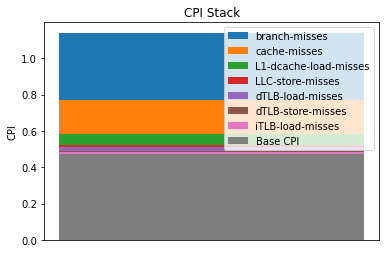

In [17]:
#creating the array of all the values of CPI of all the miss event so that we can directly get value byindexing also appended base CPI
array_of_cpi=[cpi_of_c1,cpi_of_c2,cpi_of_c3,cpi_of_c4,cpi_of_c5,cpi_of_c6,cpi_of_c7,Base_cpi]

label_of_cpi=[]  # this array will store the name of all the miss event we have 
for i in range(0,7):
    label_of_cpi.append(a_list[i])
label_of_cpi.append('Base CPI') # we also add base cpi in the array becuase this will be the base of stack

sum_prev_cpi=0 # for building the stck we will need CPI in the format of sum because if we are moving up in the bar graph than our value is increasing by that number

for i in range(7,-1,-1):  # getting the sum to build stack (Here base cpi is not used becuase we not need to do any sumation for base CPI becuse that will be base of stack)
    array_of_cpi[i]=array_of_cpi[i]+sum_prev_cpi
    sum_prev_cpi=array_of_cpi[i]
    
width = 0.55        # width of the bar

fig, ax = plt.subplots() # generating the CPI stack
for i in range(0,8):
    ax.bar( width,array_of_cpi[i],  label=label_of_cpi[i])
    
ax.set_ylabel('CPI')  # y axis is labled as CPI
ax.set_title('CPI Stack')
ax.legend()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

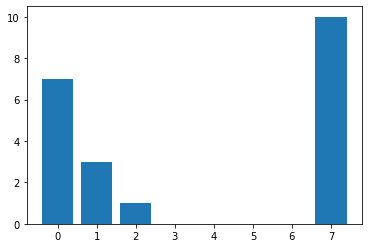

In [18]:
# For better visulation of the miss event we have built this bar graph so that we can compare all the miss event 
# including the base CPI (By comapring the length of bar we can analyze that which event is contributing how much
# to the CPI)

r=[cpi_of_c1,cpi_of_c2,cpi_of_c3,cpi_of_c4,cpi_of_c5,cpi_of_c6,cpi_of_c7,Base_cpi]
s = np.array([int((x - min(r))/(max(r) - min(r)) * 10) for x in r])

plt.bar(np.arange(len(s)), s)
plt.show()

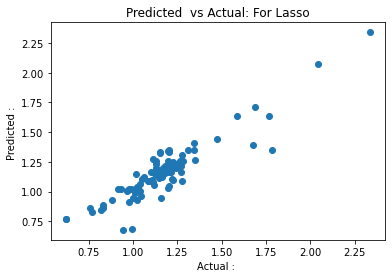

In [19]:
# we have plotted our prediction
# here y axis is predicted value and x axis is actual value 
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual : ")
plt.ylabel("Predicted : ")
plt.title("Predicted  vs Actual: For Lasso")
plt.show()

In [20]:
# Note:- Code below for here is just for checking not used in assignment report or anywhere else 
# All the code below from this point is for Linear regression we have just used this to check that what is the 
# difference we got between the Linear regression model and lasso model 


from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
# temp=regressor.fit(X_train, y_train)
temp=regressor_linear.fit(X_train, y_train)
y_pred_linear = regressor_linear.predict(X_test)


In [21]:
print('Linear Intercept term: ',temp.intercept_) # This gives us the intercept term
print('Linear Coefficients: \n',temp.coef_) 
# print(temp.coef_)


Linear Intercept term:  0.4751158502694339
Linear Coefficients: 
 [2.70475029e+01 1.04253519e+01 1.01887420e+00 2.76684585e+01
 3.90679762e+01 3.65819065e+01 5.53681784e+03]


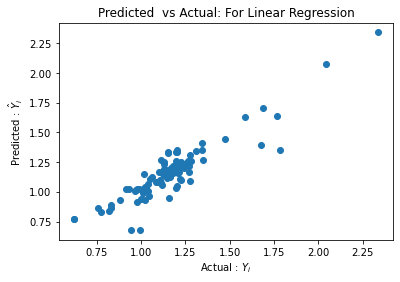

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_linear)
plt.xlabel("Actual : $Y_i$")
plt.ylabel("Predicted : $\hat{Y}_i$")
plt.title("Predicted  vs Actual: For Linear Regression")
plt.show()
# print(y_pred_linear)
# print(y_pred)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
print()
rmse = sqrt(mean_squared_error(y_test, y_pred_linear))  # Computing value of Root Mean Square Error for testing data
print("RMSE:- ",rmse)

rsq = r2_score(y_test,y_pred) # Computing R-Squared for testing data
print('R-square: ',rsq)


RMSE:-  0.09669778688013732
R-square:  0.8315337425626893
